In [8]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sb
import matplotlib.pyplot as plt

In [82]:
m = 9

x_test = np.arange(0, 2.01, 0.25, dtype = float)

y_test1 = np.array([
    20.00,
    51.58,     
    68.73,     
    75.46,     
    74.36,     
    67.09,     
    54.73,     
    37.98,     
    17.28,      
])

y_test2 = np.array([
    20.00,
    24.13,
    26.50,
    27.13,
    26.00,
    23.13,
    18.50,
    12.13,
    4.00,
])

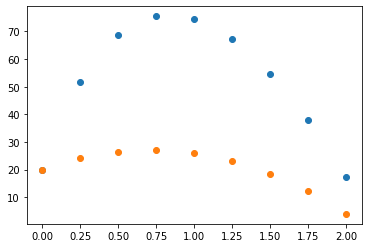

In [16]:
#Посмотрим распределение данных на графике
plt.grid()
plt.plot(x, y1, 'o')
plt.plot(x, y2, 'o')

In [174]:
from scipy.optimize import minimize_scalar

def f(_lambda, C, x):
    return C[0] + C[1] * x + C[2] * (x ** 2) + C[3] * (np.e ** (_lambda * x))

def solve_1(_lambda):
    #Создаём матрицу
    A =  np.ones((m, 4), dtype=float)
    A[:, 1] = x_test
    A[:, 2] = x_test ** 2
    A[:, 3] = np.e ** (_lambda * x_test)
    
    #Используем метод наименьших квадратов
    C = np.linalg.lstsq(A, y_test1)[0]
    
    y_approxymated = f(_lambda, C, x_test)
    
    return np.sum((y_approxymated - y_test1) ** 2)


def solve_2(_lambda):
    #Создаём матрицу
    A =  np.ones((m, 4), dtype=float)
    A[:, 1] = x_test
    A[:, 2] = x_test ** 2
    A[:, 3] = np.e ** (_lambda * x_test)
    
    #Используем метод наименьших квадратов
    C = np.linalg.lstsq(A, y_test2)[0]
    
    y_approxymated = f(_lambda, C, x_test)
    
    return np.sum((y_approxymated - y_test2) ** 2)

_lambda = minimize_scalar(solve_1, bounds=[-10, 10], method='bounded')['x']



-1.752879993512172


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
